In [1]:
import math
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as patches
from nmf_methods.nmf_son.utils import load_results
from nmf_methods.nmf_son.new import nmf_son_new
from nmf_methods.nmf_son.base import nmf_son
np.random.seed(42)
np.set_printoptions(precision=3)

In [2]:
!ls

accelaration testing.ipynb other methods.ipynb
dataset creation.ipynb     tolerance check.ipynb
datasets                   vanilla_test.ipynb
lambda tuning.ipynb


In [3]:
X = np.load('../experimental/datasets/urban_small.npz')['X']
m, n =  X.shape
rank = 6

ini_W = np.random.rand(m, rank)
ini_H = np.random.rand(rank, n)

In [11]:
W1, H1, fscores1, gscores1, lambda_vals1 = nmf_son_new(X, ini_W.copy(), ini_H.copy(), _lambda=0.1, itermax=200, early_stop=False, verbose=True)

Iteration: 1, f=124071088.57419795, g=10389.385334322209,  total=124520887.84463656
Iteration: 2, f=95159795.79063793, g=10368.513854312943,  total=107541979.71591231
Iteration: 3, f=79782353.66874456, g=10668.220479822887,  total=89573396.98096587
Iteration: 4, f=69285534.6578881, g=11051.470333169495,  total=77550383.66760041
Iteration: 5, f=62037047.80368922, g=11408.81959421251,  total=69189636.02561954
Iteration: 6, f=56734281.13331971, g=11770.155914819292,  total=63134467.57780456
Iteration: 7, f=52718522.38340465, g=12206.61232412551,  total=58602330.383011885
Iteration: 8, f=49527536.917016245, g=12796.454906591163,  total=55054133.29370329
Iteration: 9, f=46763844.27531935, g=13600.681930669018,  total=52027866.86075311
Iteration: 10, f=44076620.10833414, g=14634.731534452063,  total=49108546.521854475
Iteration: 11, f=41395222.93255396, g=15760.328670049128,  total=46141890.25567443
Iteration: 12, f=38844881.796270095, g=16787.453762786452,  total=43254183.18540363
Iteration

In [5]:
W2, H2, fscores2, gscores2, lambda_vals2 = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=1, itermax=200, early_stop=False, verbose=True)

Iteration: 1, f=63759629.14999551, g=2769.141305740978,  total=64958504.44336721
Iteration: 2, f=31140168.142861217, g=88973.41636618135,  total=2079757918.3294601
Iteration: 3, f=5766604.688084802, g=3127.333774169009,  total=6861152.964905695
Iteration: 4, f=4153452.0450864313, g=7320.086729725873,  total=17651226.66750936
Iteration: 5, f=3177753.7796594403, g=3403.2470804492305,  total=5108772.368390783
Iteration: 6, f=2775471.3235320873, g=4262.816302769647,  total=6755840.746586738
Iteration: 7, f=2464044.8387226164, g=3578.2257223549886,  total=4793787.003560589
Iteration: 8, f=2097410.1446958096, g=3800.979433124455,  total=4714848.082098231
Iteration: 9, f=1686789.5175955354, g=3544.958099356449,  total=3642925.090262903
Iteration: 10, f=1347720.2916094237, g=3386.6996497914056,  total=2959206.0435989005
Iteration: 11, f=1110403.5086978325, g=3262.61354466926,  total=2408744.351559802
Iteration: 12, f=949585.6287570567, g=3179.068993138178,  total=2031555.4410079801
Iteration: 

In [6]:
def plot_scores(fscores, gscores, lambda_vals, plot_title):
    #removing initial f,g, total
    fscores = fscores[1:]
    gscores = gscores[1:]
    lambda_vals = lambda_vals[1:]

    def plot_ax(ax, f, g, total):
        ax.plot(total, color='black', linewidth=3, label='$F(W, H)$')
        ax.plot(f, color='cyan', linewidth=1.5, label='$f(W, H)$')
        ax.plot(g, color='yellow', linewidth=1.5, label='$g(W)$')
        ax.legend()

    total_score = fscores + lambda_vals * gscores
    fig, axs = plt.subplots(2, 1, figsize=(5, 10))


    fig.suptitle(plot_title, fontsize=20)

    axs[0].set_yscale('log')
    plot_ax(axs[0], fscores, gscores, total_score)
    axs[0].set_title('log scale', fontsize=16)

    axs[1].set_yscale('log')
    plot_ax(axs[1], fscores - fscores[-1], gscores - gscores[-1], total_score - total_score[-1])
    axs[1].set_title('log(score - score*)', fontsize=16)

def plot__multi_scores(comp_vers, fscore_arr, gscore_arr, lambda_val_arr, plot_title=None):
    def plot_ax(ax, f, g, total):
        ax.plot(total, color='black', linewidth=3)
        ax.plot(f, color='cyan', linewidth=1.5)
        ax.plot(g, color='yellow', linewidth=1.5)
        ax.legend(['F', 'f', 'g'])    #removing initial f,g, total

    no_vers = len(comp_vers)
    fig, axs = plt.subplots(2, no_vers, figsize=(5 * no_vers, 10))
    if plot_title:
        fig.suptitle(plot_title, fontsize=20)

    for ver in range(no_vers):
        fscores = fscore_arr[ver][1:]
        gscores = gscore_arr[ver][1:]
        lambda_vals = lambda_val_arr[ver][1:]
        total_score = fscores + lambda_vals * gscores

        axs[0, ver].set_yscale('log')
        plot_ax(axs[0, ver], fscores, gscores, total_score)
        axs[0, ver].set_title('log scale', fontsize=16)

        axs[1, ver].set_yscale('log')
        plot_ax(axs[1, ver], fscores - min(fscores), gscores - min(gscores), total_score - min(total_score))
        axs[1, ver].set_title('log(score - score*)', fontsize=16)

def plot_images(H, img_size, comparison_idxs):
    fig, axs = plt.subplots(1, len(comparison_idxs), figsize=(20, 10))

    for i, idx in enumerate(comparison_idxs):
        h_idx_3d = H[idx, :].reshape(img_size, order='F')

        axs[i].imshow(h_idx_3d)
        img = axs[i].imshow(h_idx_3d, cmap='gray')
        divider = make_axes_locatable(axs[i])

        cax = divider.append_axes('right', size='5%', pad=0.1)
        fig.colorbar(img, cax=cax, orientation='vertical')
        axs[i].set_title(f'H({idx+1})')

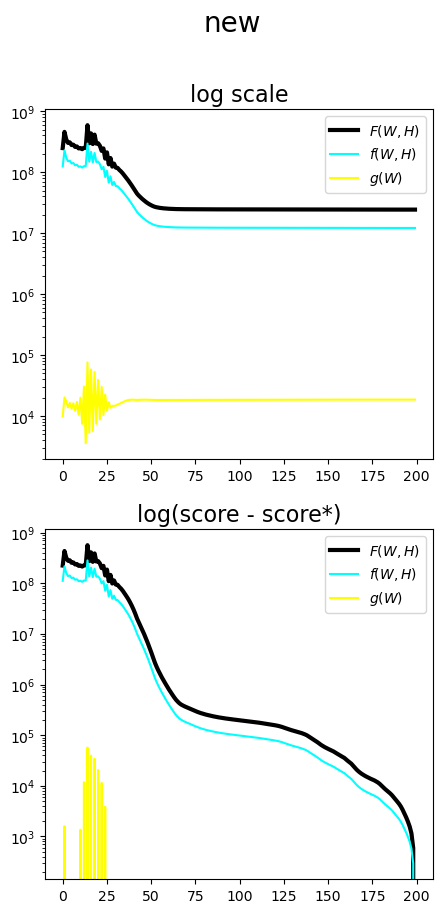

In [7]:
plot_scores(fscores1, gscores1, lambda_vals1, 'new')

In [8]:
comp_idxs = range(rank)
img_size = (20, 10)

In [9]:
def plot_matrices(W, H, img_size, comparison_idxs, filename=None):
    fig, axs = plt.subplots(2, len(comparison_idxs), figsize=(20, 10), sharey='row', sharex='row')

    for i, idx in enumerate(comparison_idxs):
        axs[0, i].plot(W[:, idx])
        axs[0, i].set_title(f'$W_{idx+1}$')

        h_idx_3d = H[idx, :].reshape(img_size, order='F')
        axs[1, i].imshow(h_idx_3d)
        img = axs[1, i].imshow(h_idx_3d, cmap='gray')
        divider = make_axes_locatable(axs[1, i])

        cax = divider.append_axes('right', size='5%', pad=0.1)
        fig.colorbar(img, cax=cax, orientation='vertical')
        axs[1, i].set_title(f'$H_{idx+1}$')
    if filename:
        fig.savefig(filename)


In [10]:
Wb, Hb, Wl, Hl, fscores, gscores, lambda_vals = load_results('../saved_models/urban_small_tuning/r6_l2.npz')
plot_matrices(Wl, Hl, img_size, comp_idxs, 'urban_small_r6_l2.png')

FileNotFoundError: [Errno 2] No such file or directory: '../saved_models/urban_small_tuning/r6_l2.npz'

In [ ]:
model = NMF(n_components=rank, init='custom', random_state=42, tol=1e-5, max_iter=3000)
vanillaW = model.fit_transform(X=X, W=ini_W.copy(), H=ini_H.copy())
vanillaH = model.components_
plot_matrices(vanillaW, vanillaH, img_size, comp_idxs, 'urban_small_r6_vanilla.png')


In [ ]:
plot_matrices(vanillaW, vanillaH, img_size, comp_idxs)
# plot_images(vanillaH, img_size, comp_idxs)

In [1]:
import numpy as np

y = np.arange(5)
y

array([0, 1, 2, 3, 4])

In [2]:
y = y.reshape(5, 1)

In [3]:
np.linalg.norm(y)**2

30.0

In [4]:
y @ y.T

array([[ 0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4],
       [ 0,  2,  4,  6,  8],
       [ 0,  3,  6,  9, 12],
       [ 0,  4,  8, 12, 16]])

In [12]:
def create_toy_ex(n):
    W = np.random.rand(2, 3)
    H = np.ones((3, n))
    thres = 0.88
    id = np.argwhere(np.sum(H >= thres, axis=0))
    while id.any():
        id = np.argwhere(np.sum(H >= thres, axis=0))
        H[:, id.flatten()] = np.random.dirichlet((0.33, 0.33, 0.33), len(id)).T

    M = W @ H
    return M, W, H

# %% Load data
# [M,Wtrue,Htrue] = loadToy( 30 );
# %load('ToySep.mat');
# [m,n] = size(M);
# %%
# r     = 5;
# lam   = 0.1;
# Wini  = rand(m,r);
# Hini  = rand(r,n);
# Fini  = evaF(M,Wini,Hini,lam);
# %%
# itermax = 7e2;

[3 3 3 3 3] [0 1 2 3 4]
[1 0 0 1 1] [0 1 2 3 4]
[0 0 0 0 1] [0 3 4]
[0 0 0 0 1] [4]
[0 0 0 0 0] [4]


In [46]:
H[:, id.flatten()]

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [9]:
np.random.dirichlet((0.33, 0.33, 0.33), len(id)).T

array([[3.01243224e-02, 3.32953106e-02, 3.46048200e-01, 4.18857802e-02,
        1.38715480e-01],
       [9.69745631e-01, 4.31774159e-01, 1.20603200e-02, 5.24942163e-01,
        3.60741487e-01],
       [1.30047060e-04, 5.34930531e-01, 6.41891480e-01, 4.33172057e-01,
        5.00543033e-01]])

In [22]:
id.any()

False

array([], shape=(0, 1), dtype=bool)